# Netflix Stock Price Predictor

In this project, we will use certain features regarding the price of Netflix stock in order to predict what the price will be five days later. This model uses multivariable regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

## Analysing the Data

Let's open our dataset and check out the first few rows

In [2]:
df = pd.read_csv('/Users/zacrossman/Downloads/NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
print(df.shape)

(1009, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


We see that we have no null values in our data, which is good. Now lets take a closer look at the columns: 

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


All of our data seems to be pretty close to each other. No feature in particular contains data with massively different means, mins, or maxes. So when we first train our algorithm, we'll leave the data as it is. We can standardize or normalize the data as we see fit upon seeing the results of our model's accuracy. 

## Manipulating the Data

We won't be needing the 'Adj Close' column, so lets drop it from our data set.

In [7]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


Now we have our relevant columns. We are going to try to predict the 'Close' Value five days in advance, using the other values in our data set. So we need to make a label column that represents the 'Close' value five days later, in relation to that row. 

In [8]:
df['Label'] = df['Close'].shift(-5)
df.head(n = 10)

,Date,Open,High,Low,Close,Volume,Label
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,257.950012
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,258.269989
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,266.000000
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,280.269989
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,278.519989
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,8534900,278.549988
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,6855200,281.040009
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,10972000,278.140015
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,10759700,285.929993
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,8312400,294.160004


As we can see, our Label value for row 0 is the Close value for row 5, which is exactly what we want. Now, since the label column is essentially the Close column shifted up 5 rows, lets take a look at the end of our dataset to see what the implications of that shift are.

In [9]:
df.tail(n = 10)

,Date,Open,High,Low,Close,Volume,Label
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,32346000,427.140015
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,15145800,457.130005
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,12684000,429.480011
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,24324700,405.600006
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,11966600,410.170013
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,NaN
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,NaN
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,NaN
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,NaN
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,7782400,NaN


We can't work with null data, which makes of the last five values of our Label column. We'll still have 1003 rows to work will, so we can just go ahead and delete those rows will null values. 

In [10]:
df.dropna(axis = 0, inplace = True)
df.tail(n = 10)

,Date,Open,High,Low,Close,Volume,Label
994,2022-01-14,517.599976,538.369995,511.880005,525.690002,7849400,387.149994
995,2022-01-18,520.080017,521.750000,508.679993,510.799988,4839100,366.420013
996,2022-01-19,515.000000,523.210022,510.510010,515.859985,4353500,359.700012
997,2022-01-20,517.750000,526.640015,506.929993,508.250000,12659000,386.700012
998,2022-01-21,400.429993,409.149994,379.989990,397.500000,58904300,384.359985
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,32346000,427.140015
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,15145800,457.130005
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,12684000,429.480011
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,24324700,405.600006
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,11966600,410.170013


Now our data should be all set to go! Our next step is to convert our feature columns and our label column into arrays.

In [11]:
X = np.array(df.drop(['Label', 'Date'], axis = 1))
y = np.array(df['Label'])

Now that our data is fully prepared and has been converted to arrays, we can split our data into training data and testing data. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

print('Training data shape:',X_train.shape, y_train.shape)
print()
print('Test data shape:', X_test.shape, y_test.shape)
print()

Training data shape: (803, 5) (803,)

Test data shape: (201, 5) (201,)



As we can see, our training input data has 803 rows and 5 columns, and our training output data has 803 rows and just one column, as we are just predicting one output per row. Our test data is smaller, and only contains 201 rows.

## Training and Implementing our Model

Now lets use scikit learn to create a line of best fit for our linear regression model. 

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Now lets use our newly created model to make a prediction on our test data, and compare our predictions to the actual data. 

In [14]:
y_pred = regressor.predict(X_test)
print('First five predicted prices:', y_pred[:5])
print()
print('First five actual prices:', y_test[:5])
print()

comparison = []
for i in range(len(y_test)):
    a_list = []
    a_list.append(y_pred[i])
    a_list.append(y_test[i])
    comparison.append(a_list)
print('Side by side comparison:', comparison[:5])
print()

accuracy = regressor.score(X_test, y_test)
print('Accuracy:', accuracy)

First five predicted prices: [545.14571937 485.41255794 349.57839191 380.19445185 439.61302598]

First five actual prices: [582.070007 507.76001  377.339996 366.600006 447.670013]

Side by side comparison: [[545.145719370326, 582.070007], [485.4125579423162, 507.76001], [349.57839191424495, 377.339996], [380.19445185409984, 366.600006], [439.61302598490755, 447.670013]]

Accuracy: 0.9500835813989353


Lets round these prices to the nearest integer to increase readability

In [15]:
y_pred = np.round(y_pred)
print(y_pred[:5])

[545. 485. 350. 380. 440.]


In [16]:
y_test = np.round(y_test)
print(y_test[:5])

[582. 508. 377. 367. 448.]


In [17]:
comparison = []
for i in range(len(y_test)):
    a_list = []
    a_list.append(y_pred[i])
    a_list.append(y_test[i])
    comparison.append(a_list)
print('Side by side comparison:', comparison[:5])
print()
print('Accuracy:', accuracy)

Side by side comparison: [[545.0, 582.0], [485.0, 508.0], [350.0, 377.0], [380.0, 367.0], [440.0, 448.0]]

Accuracy: 0.9500835813989353


## Visualizing our Model's Predictions

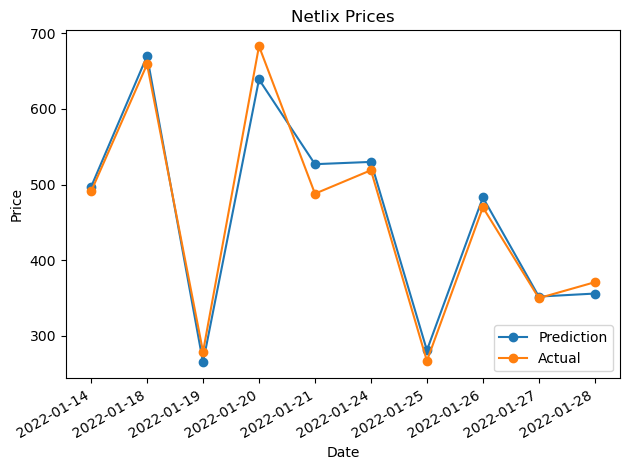

In [18]:
recent_pred = y_pred[-10:]
recent_test = y_test[-10:]

date = df['Date']
recent_dates = date[-10:]

plt.plot_date(recent_dates, recent_pred, linestyle = 'solid')
plt.plot_date(recent_dates, recent_test, linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.title('Netlix Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Prediction', 'Actual'], loc = 4)
plt.tight_layout()
plt.show()

Our graph confirms our accuracy (squared error) outputs in the high 90's, showing our model is strong at predicting the stock price five days in advance. 